## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [36]:
# Combine the data into a single dataset with an outermerge (class demo - merging)
merged_df = pd.merge(mouse_metadata, study_results , on="Mouse ID", how="outer")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
#get number of mice
pre_drop_mouse_count = len(merged_df["Mouse ID"].unique())
print("Number of Mice: " + str(pre_drop_mouse_count))

Number of Mice: 249


In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[['Mouse ID', 'Timepoint']]
duplicate_mice = duplicate_mice[duplicate_mice.duplicated()]
duplicate_mice.tail()

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
# cant include the tumor volume and metastatic sites
duplicate_mice = merged_df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)','Timepoint', 
                            'Tumor Volume (mm3)', 'Metastatic Sites']]
# duplicate_mice = duplicate_mice[duplicate_mice.duplicated()]
duplicate_mice[duplicate_mice['Mouse ID']=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)
#drop mouse by criteria Mouse ID = g989 - https://hackersandslackers.com/pandas-dataframe-drop/
mouse_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_df["Mouse ID"].unique())
print("Number of Mice: " + str(mouse_count))

Number of Mice: 248


In [42]:
#list of drug regimens
mouse_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [43]:
#https://stackoverflow.com/questions/46639182/calculating-mean-std-dev-and-variance-and-creating-a-new-data-frame-from-these
drug_mean = mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [44]:
drug_median = mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [45]:
drug_var = mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [46]:
drug_std = mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [47]:
drug_sem = mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
drug_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [48]:
# Groupby - Summary stats table (mean, median, variance, standard deviation, and SEM) of the tumor volume for each regimen
drug_stats = pd.DataFrame({"Mean" : drug_mean,
                           "Median": drug_median,
                           "Variance": drug_var, 
                           "Std. Dev": drug_std,
                           "Std. Error": drug_sem})
drug_stats

,Mean,Median,Variance,Std. Dev,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# Aggregation method - Summary stats table (mean, median, variance, std deviation, and SEM) of the tumor volume for each regimen
# produce the same summary statistics in a single line
# agg_mouse = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
# agg_mouse = mouse_df["Tumor Volume (mm3)"]
# agg_method_mean = np.mean(agg_mouse)
# agg_method_median = np.median(agg_mouse)
# agg_method_mean = np.var(agg_mouse)
# agg_method_ = np.std(agg_mouse)
# # agg_method_sem = np.sem(agg_mouse)
# print(agg_method_mean)


79.42063964177214


## Bar and Pie Charts

In [50]:
#Total Measurements Count
measure_count = mouse_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
measure_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

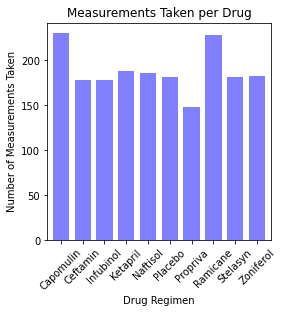

In [53]:
#Pandas Bar Chart: Total Measurements Count
measure_count.plot(kind="bar", color="b", alpha=.5, width=.75, figsize=(4,4))
plt.xticks(rotation=45)
# plt.xlim(-.9, len("Drug Regimen")-.1)
# plt.ylim(0, max(measurements) +50)
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.show()

Text(0, 0.5, 'Number of Measurements Taken')

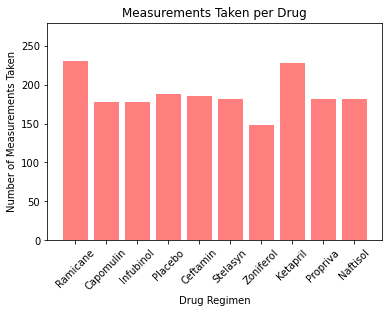

In [54]:
#Pyplot Bar Chart: Total Measurements Count
#(width of bars) https://stackoverflow.com/questions/14824456/edit-the-width-of-bars-using-dataframe-plot-function-in-matplotlib
drug = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
measurements = measure_count

plt.bar(drug, measurements, color = "r", alpha=.5, align="center")
plt.xticks(rotation=45)
plt.xlim(-.9, len(drug)-.1)
plt.ylim(0, max(measurements) +50)
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

In [55]:
#Distribution of male vs. female
sex_sort = mouse_df[["Mouse ID", "Sex"]].drop_duplicates()
sex_count = sex_sort["Sex"].value_counts()
sex_count

Male      125
Female    123
Name: Sex, dtype: int64

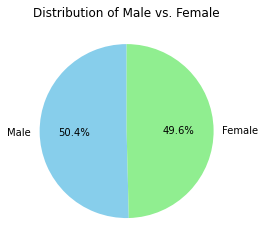

In [56]:
# Pandas Pie Chart: Female vs. Male
sex_pie = sex_count.plot(kind="pie", title="Distribution of Male vs. Female", autopct="%1.1f%%", 
                         startangle=90, colors = ["skyblue", "lightgreen"])
sex_pie.set_ylabel("")
sex_pie

(-1.1018390827045563,
 1.103492681505578,
 -1.1031843716069307,
 1.1001516367431872)

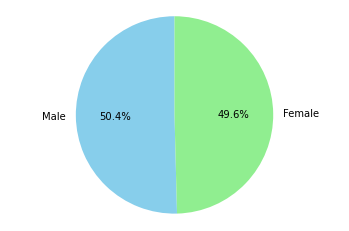

In [57]:
# Pyplot Pie Chart: Female vs. Male
sex = ["Male", "Female"]
count = sex_count
colors = ["skyblue", "lightgreen"]

plt.pie(count, labels=sex, colors = colors, autopct="%1.1f%%", startangle=90)
# plt.title("Distribution of Male vs. Female")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [105]:
#https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
top_4 = pd.DataFrame(mouse_df.groupby(["Mouse ID"]).max().reset_index())
top_4.drop(top_4[top_4["Drug Regimen"]=="Propriva"].index, inplace=True)
top_4.drop(top_4[top_4["Drug Regimen"]=="Placebo"].index, inplace=True)
top_4.drop(top_4[top_4["Drug Regimen"]=="Naftisol"].index, inplace=True)
top_4.drop(top_4[top_4["Drug Regimen"]=="Stelasyn"].index, inplace=True)
top_4.drop(top_4[top_4["Drug Regimen"]=="Zoniferol"].index, inplace=True)
top_4.drop(top_4[top_4["Drug Regimen"]=="Ketapril"].index, inplace=True)
top_4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,45.466677,1
7,a444,Ramicane,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,Female,6,27,45,68.594745,4
239,y793,Capomulin,Male,17,17,45,45.000000,2
240,y865,Ceftamin,Male,23,26,45,64.729837,3
244,z578,Ramicane,Male,11,16,45,45.000000,0


In [74]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = pd.DataFrame(mouse_df.groupby(["Mouse ID"]).max()["Timepoint"])
tumor_vol

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [76]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_vol2 = pd.DataFrame(mouse_df.groupby(["Mouse ID"]).max().reset_index())
tumor_vol2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,45.000000,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [82]:
tumor_cap=tumor_vol2[tumor_vol2["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
tumor_cap.tail(50)

19     45.651331
24     45.000000
61     45.000000
64     46.304003
66     46.809225
80     47.685963
83     45.595685
85     48.158209
87     46.408361
108    48.070452
115    46.154737
121    45.000000
124    46.414518
162    46.539206
163    45.781746
169    47.373423
174    45.000000
180    45.000000
183    46.749006
192    47.212200
204    45.704434
208    45.000000
220    45.893720
226    45.473753
239    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [86]:
tumor_ram=tumor_vol2[tumor_vol2["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
tumor_ram

6      45.466677
7      45.000000
10     45.000000
12     46.910892
33     45.722279
37     46.940945
45     45.000000
52     46.409084
70     45.851531
76     45.000000
77     45.000000
91     45.252534
93     46.343832
96     45.000000
119    45.000000
126    45.521875
157    45.766111
158    46.585433
166    45.625802
168    45.568211
177    45.000000
190    47.622816
217    45.000000
235    46.378092
244    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [87]:
tumor_infu=tumor_vol2[tumor_vol2["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
tumor_infu

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     45.000000
41     60.969711
50     62.435404
56     60.918767
78     67.289621
97     66.196912
101    62.117279
123    47.010364
129    60.165180
141    55.629428
142    45.699331
153    54.656549
170    55.650681
197    46.250112
200    54.048608
202    51.542431
211    50.005138
216    58.268442
233    67.685569
245    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [88]:
tumor_ceft=tumor_vol2[tumor_vol2["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
tumor_ceft

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#why? - talked to roger (we dont think we need to do this)
# tumor_merge = pd.merge(tumor_vol2, mouse_df, on=["Mouse ID"])
# tumor_merge
# tumor_drugs = pd.merge(tumor_cap, tumor_ram, on = ['Tumor Volume (mm3)'])
# tumor_drugs

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# (skip) Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# cap_tumor_vol_data = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

In [85]:
#Capomulin
cap_tumor_vol_data = []
cap_tumor_vol_data.append(tumor_cap)

quantile_cap = cap_tumor_vol_data[0]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = quantile_cap.quantile([.25,.5,.75])
# print(cap_tumor_vol_data)

lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.74900552
The interquartile range of Capomulin is: 1.7490055199999972
The the median of Capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


In [89]:
ram_tumor_vol_data = []
ram_tumor_vol_data.append(tumor_ram)

quantile_ram = ram_tumor_vol_data[0]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = quantile_ram.quantile([.25,.5,.75])
# print(cap_tumor_vol_data)

lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34383237
The interquartile range of Ramicane is: 1.3438323700000012
The the median of Ramicane is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


In [91]:
infu_tumor_vol_data = []
infu_tumor_vol_data.append(tumor_infu)

quantile_infu = infu_tumor_vol_data[0]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = quantile_infu.quantile([.25,.5,.75])
# print(cap_tumor_vol_data)

lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [92]:
ceft_tumor_vol_data = []
ceft_tumor_vol_data.append(tumor_ceft)

quantile_ceft = ceft_tumor_vol_data[0]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = quantile_ceft.quantile([.25,.5,.75])
# print(cap_tumor_vol_data)

lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x17e489c05e0>,
 'caps': [<matplotlib.lines.Line2D at 0x17e489c0ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e489c0280>],
 'medians': [<matplotlib.lines.Line2D at 0x17e489b5370>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e489b5640>],
 'means': []}

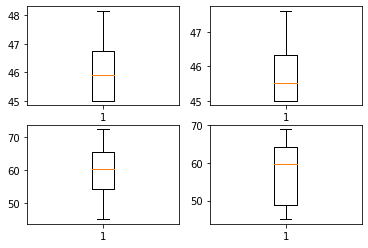

In [124]:
# cap_tumor_vol_data
# fig1, ax1 = plt.subplots()
# ax1.set_title("Final Tumor Volume - Capomulin")
# ax1.set_ylabel("Tumor Volume (mm3)")
# ax1.boxplot(cap_tumor_vol_data)
# plt.show()

# plt.boxplot(cap_tumor_vol_data)
# plt.title("Final Tumor Volume - Capomulin")
# plt.ylabel("Tumor Volume (mm3)")
# plt.show()

# data= [cap_tumor_vol_data, ram_tumor_vol_data, infu_tumor_vol_data, ceft_tumor_vol_data]
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.boxplot(cap_tumor_vol_data)
ax2.boxplot(ram_tumor_vol_data)
ax3.boxplot(infu_tumor_vol_data)
ax4.boxplot(ceft_tumor_vol_data)


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [111]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# cap_line_df = pd.DataFrame(mouse_df.groupby(["Mouse ID"])
# cap_line_tumor=cap_line_df [cap_line_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
# cap_line_time=cap_line_df [cap_line_df["Drug Regimen"]=="Capomulin"]["Timepoint"]

# print(cap_line_tumor)
# print(cap_line_time)

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
